# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data and describe statstics

In [ ]:
rawData = pd.read_csv('./vehicles.csv')

In [ ]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [ ]:
rawData.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [ ]:
rawData.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [ ]:
rawData.shape

(426880, 18)

## Data Analysis


---


### Check for zero Values

In [ ]:
rawData.eq(0).sum()

,0
id,0
region,0
price,32895
year,0
manufacturer,0
model,0
condition,0
cylinders,0
fuel,0
odometer,1965


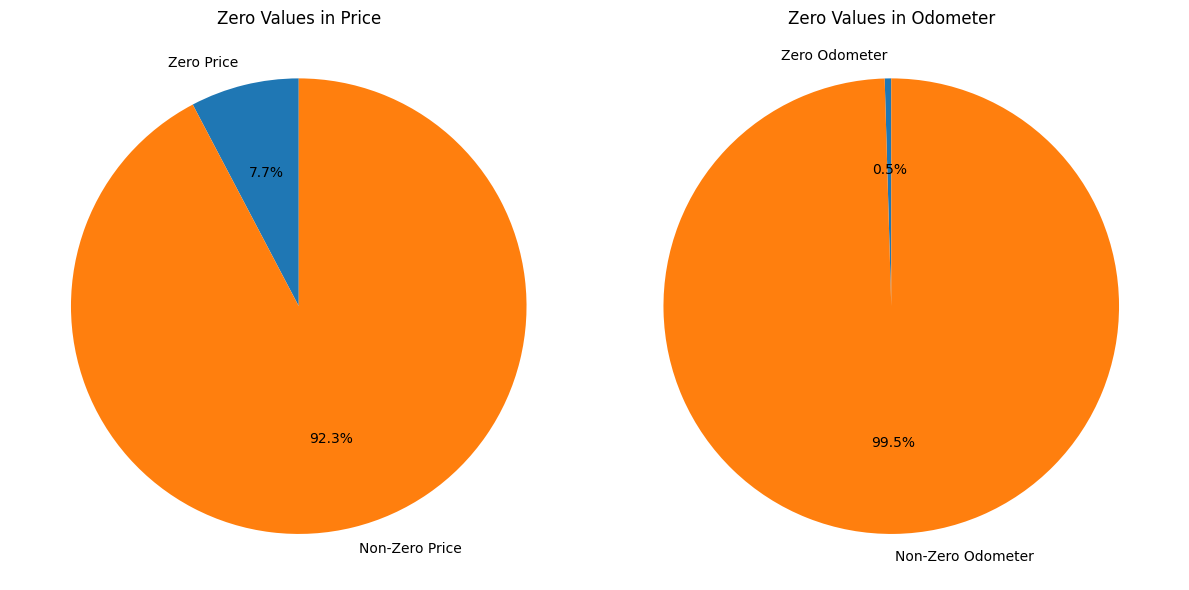

In [ ]:
#to find the percentage of zero value of total record
price_zeros = rawData['price'].eq(0).sum()
odometer_zeros = rawData['odometer'].eq(0).sum()


# Total number of records
total_records = len(rawData)

# Calculate percentages
price_zero_percentage = (price_zeros / total_records) * 100
odometer_zero_percentage = (odometer_zeros / total_records) * 100

# Create the pie charts
labels_price = ['Zero Price', 'Non-Zero Price']
sizes_price = [price_zero_percentage, 100 - price_zero_percentage]

labels_odometer = ['Zero Odometer', 'Non-Zero Odometer']
sizes_odometer = [odometer_zero_percentage, 100-odometer_zero_percentage]


fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create a figure and two subplots

# Price Pie Chart
axes[0].pie(sizes_price, labels=labels_price, autopct='%1.1f%%', startangle=90)
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[0].set_title('Zero Values in Price')

# Odometer Pie Chart
axes[1].pie(sizes_odometer, labels=labels_odometer, autopct='%1.1f%%', startangle=90)
axes[1].axis('equal')
axes[1].set_title('Zero Values in Odometer')


plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


### **Data Observation1**: Price has got around 32895 zero values of 6.6% of total data, Possible that these records dummy/unused and not interested for dealership, will drop $0 price records.

### ****Data Observation2****:odometer has got around 1965 zero values of 0.5 % of total data 426879, though this smallest values of 0 will drop thise record.



### Check for Zero values in Categoraial features

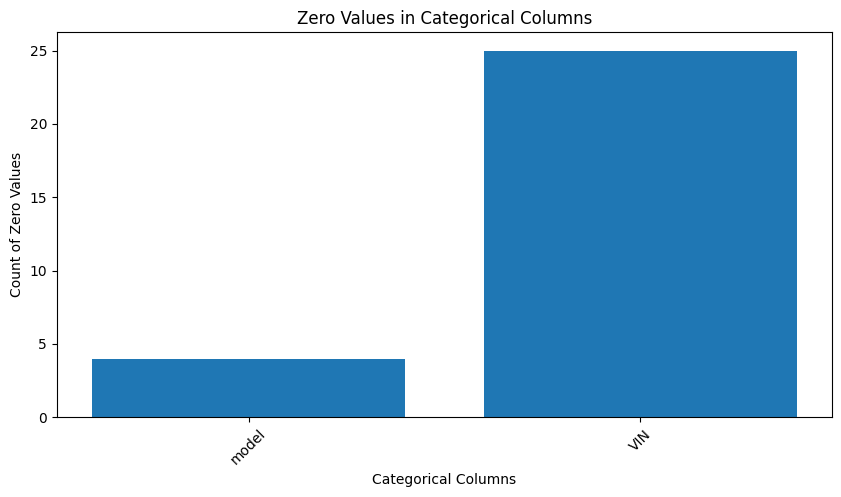

In [ ]:
# Selecting categorical columns
categorical_columns = rawData.select_dtypes(include=['object']).columns

# Checking for zero counts in categorical columns
zero_counts = {col: (rawData[col] == '0').sum() for col in categorical_columns}

# Filtering out columns that have at least one zero entry
zero_counts = {col: count for col, count in zero_counts.items() if count > 0}

# Plotting the zero counts
if zero_counts:
    plt.figure(figsize=(10, 5))
    plt.bar(zero_counts.keys(), zero_counts.values())
    plt.xlabel('Categorical Columns')
    plt.ylabel('Count of Zero Values')
    plt.title('Zero Values in Categorical Columns')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No zero values found in categorical columns.")

### ****Data Observation3****:looks there are few records in categorial field with VIN=0 and Model = 0 which records can be removed as with VIN and model number other data will be invalid also this percentage is less.

## Check for Duplicate records

In [ ]:
duplicate_rows = rawData[rawData.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))
duplicate_rows


Number of duplicate rows: 0


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state


In [ ]:
# Identify VINs with inconsistencies in critical attributes
count = rawData['VIN'].value_counts()

duplicateRec = count[count > 1]

duplicate_vin_analysis = rawData[rawData['VIN'].isin(duplicateRec.index)].groupby('VIN')[
    ['year', 'odometer', 'title_status', 'transmission', 'drive', 'fuel', 'model']
].nunique()

duplicate_vin_analysis

,year,odometer,title_status,transmission,drive,fuel,model
VIN,,,,,,,
0,8,7,2,3,2,2,6
0000000RN47028886,1,1,1,1,0,1,1
0000000T05H107426,1,1,1,1,0,1,1
0000000V264204442,1,1,1,1,1,1,1
0000004Y83Z146570,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...
ZN661XUL7HX239289,1,1,0,1,1,1,1
ZN661XUS7HX248033,1,1,1,1,0,1,1
ZN661YUA4LX344692,1,1,1,1,0,1,1


In [ ]:
rawData.query("VIN == '1FTER1EH1LLA36301'")
rawData.query("VIN == '1GCHTCE37G1186784'")

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
35,7316257769,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,1GCHTCE37G1186784,4wd,NaN,pickup,red,al
251,7316160104,birmingham,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,1GCHTCE37G1186784,4wd,NaN,pickup,red,al
1855,7315245325,dothan,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,1GCHTCE37G1186784,4wd,NaN,pickup,red,al
2166,7315385350,florence / muscle shoals,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,1GCHTCE37G1186784,4wd,NaN,pickup,red,al
2314,7316244323,gadsden-anniston,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,1GCHTCE37G1186784,4wd,NaN,pickup,red,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417059,7316774890,green bay,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,1GCHTCE37G1186784,4wd,NaN,pickup,red,wi
419188,7315296319,la crosse,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,1GCHTCE37G1186784,4wd,NaN,pickup,red,wi
419708,7316781953,madison,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,1GCHTCE37G1186784,4wd,NaN,pickup,red,wi
422238,7316655042,milwaukee,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,1GCHTCE37G1186784,4wd,NaN,pickup,red,wi


In [96]:
# Find VINs with variations in any critical attribute
vins_with_issues = duplicate_vin_analysis[
    (duplicate_vin_analysis['year'] > 1) |
    (duplicate_vin_analysis['transmission'] > 1) |
    (duplicate_vin_analysis['drive'] > 1) |
    (duplicate_vin_analysis['fuel'] > 1) |
    (duplicate_vin_analysis['model'] > 1)
].index


# Step 5: Count the total number of records with VIN inconsistencies
total_vin_with_issues = rawData[rawData['VIN'].isin(vins_with_issues)].shape[0]
total_vin_with_issues


13062

### ****Data Observation3**:

- Noticed that same VIN number is listed multiple times the regions are different few vin as got same odometer value, year.
- The dataset contains 40,280 unique VINs that have duplicate entries. This means that these 40,280 vehicles have been listed multiple times, contributing to the 348,914 duplicate rows identified earlier
- this depends on various other features like year, odometer, title_status, transmission, drive, fuel and model
- so,
-- Data entry errors
-- Multiple listings of the same vehicle with updated details
-- Incorrect merging of datasets
so around 15297 duplicate records exists multiple times.

## Check for Unique Records

In [ ]:
rawData.nunique()

,0
id,426880
region,404
price,15655
year,114
manufacturer,42
model,29649
condition,6
cylinders,8
fuel,5
odometer,104870


### **Data Observation4**: id value matches the total count of records, how ever the **VIN value contains duplicates**  as seen above.


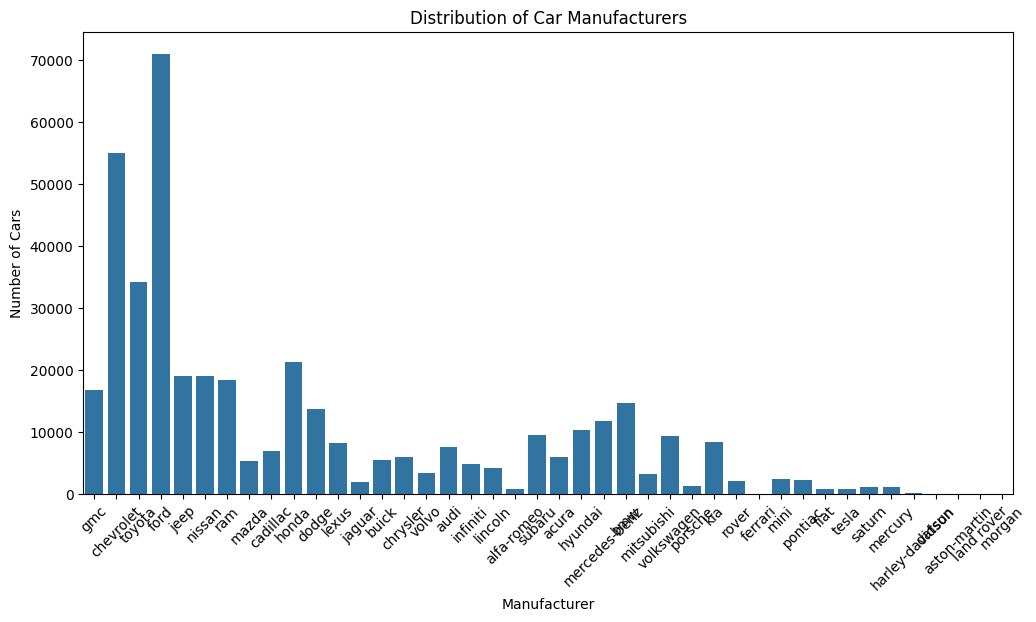

In [ ]:
# prompt: plot graph for manufacturer


# Assuming 'manufacturer' is a column in your rawData DataFrame
plt.figure(figsize=(12, 6))
sns.countplot(x='manufacturer', data=rawData)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Distribution of Car Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Cars')
plt.show()


**Data Observation5**

**Top Manufacturers Dominate Listings**

- Certain manufacturers such as Ford, Chevrolet, Toyota, Honda, and Nissan have significantly higher listings, indicating their widespread presence and popularity in the used car market.
- This aligns with real-world trends where these brands are among the highest-selling automotive manufacturers.

**American Brands Lead the Market**

- Ford and Chevrolet have the highest number of listings, showing strong demand for American-made vehicles.
- Brands like Dodge, GMC, and Jeep also have substantial representation, reflecting the popularity of trucks and SUVs.

**Japanese Brands are Strong Contenders**

- Toyota and Honda are among the most listed brands, reflecting their reputation for reliability, fuel efficiency, and resale value.
- Nissan, Subaru, and Mazda also have notable listings, reinforcing the popularity of Japanese cars in the used market.

**European Manufacturers Have Lower Representation**

- Brands like BMW, Mercedes-Benz, and Volkswagen have fewer listings compared to American and Japanese brands.
- This may be due to higher maintenance costs, lower resale demand, or fewer units in circulation.

**Luxury and Specialty Brands Have Minimal Listings**

- High-end manufacturers such as Tesla, Porsche, and Land Rover have relatively fewer listings.
- These brands cater to niche markets, and their high prices might limit their availability in the used car market.

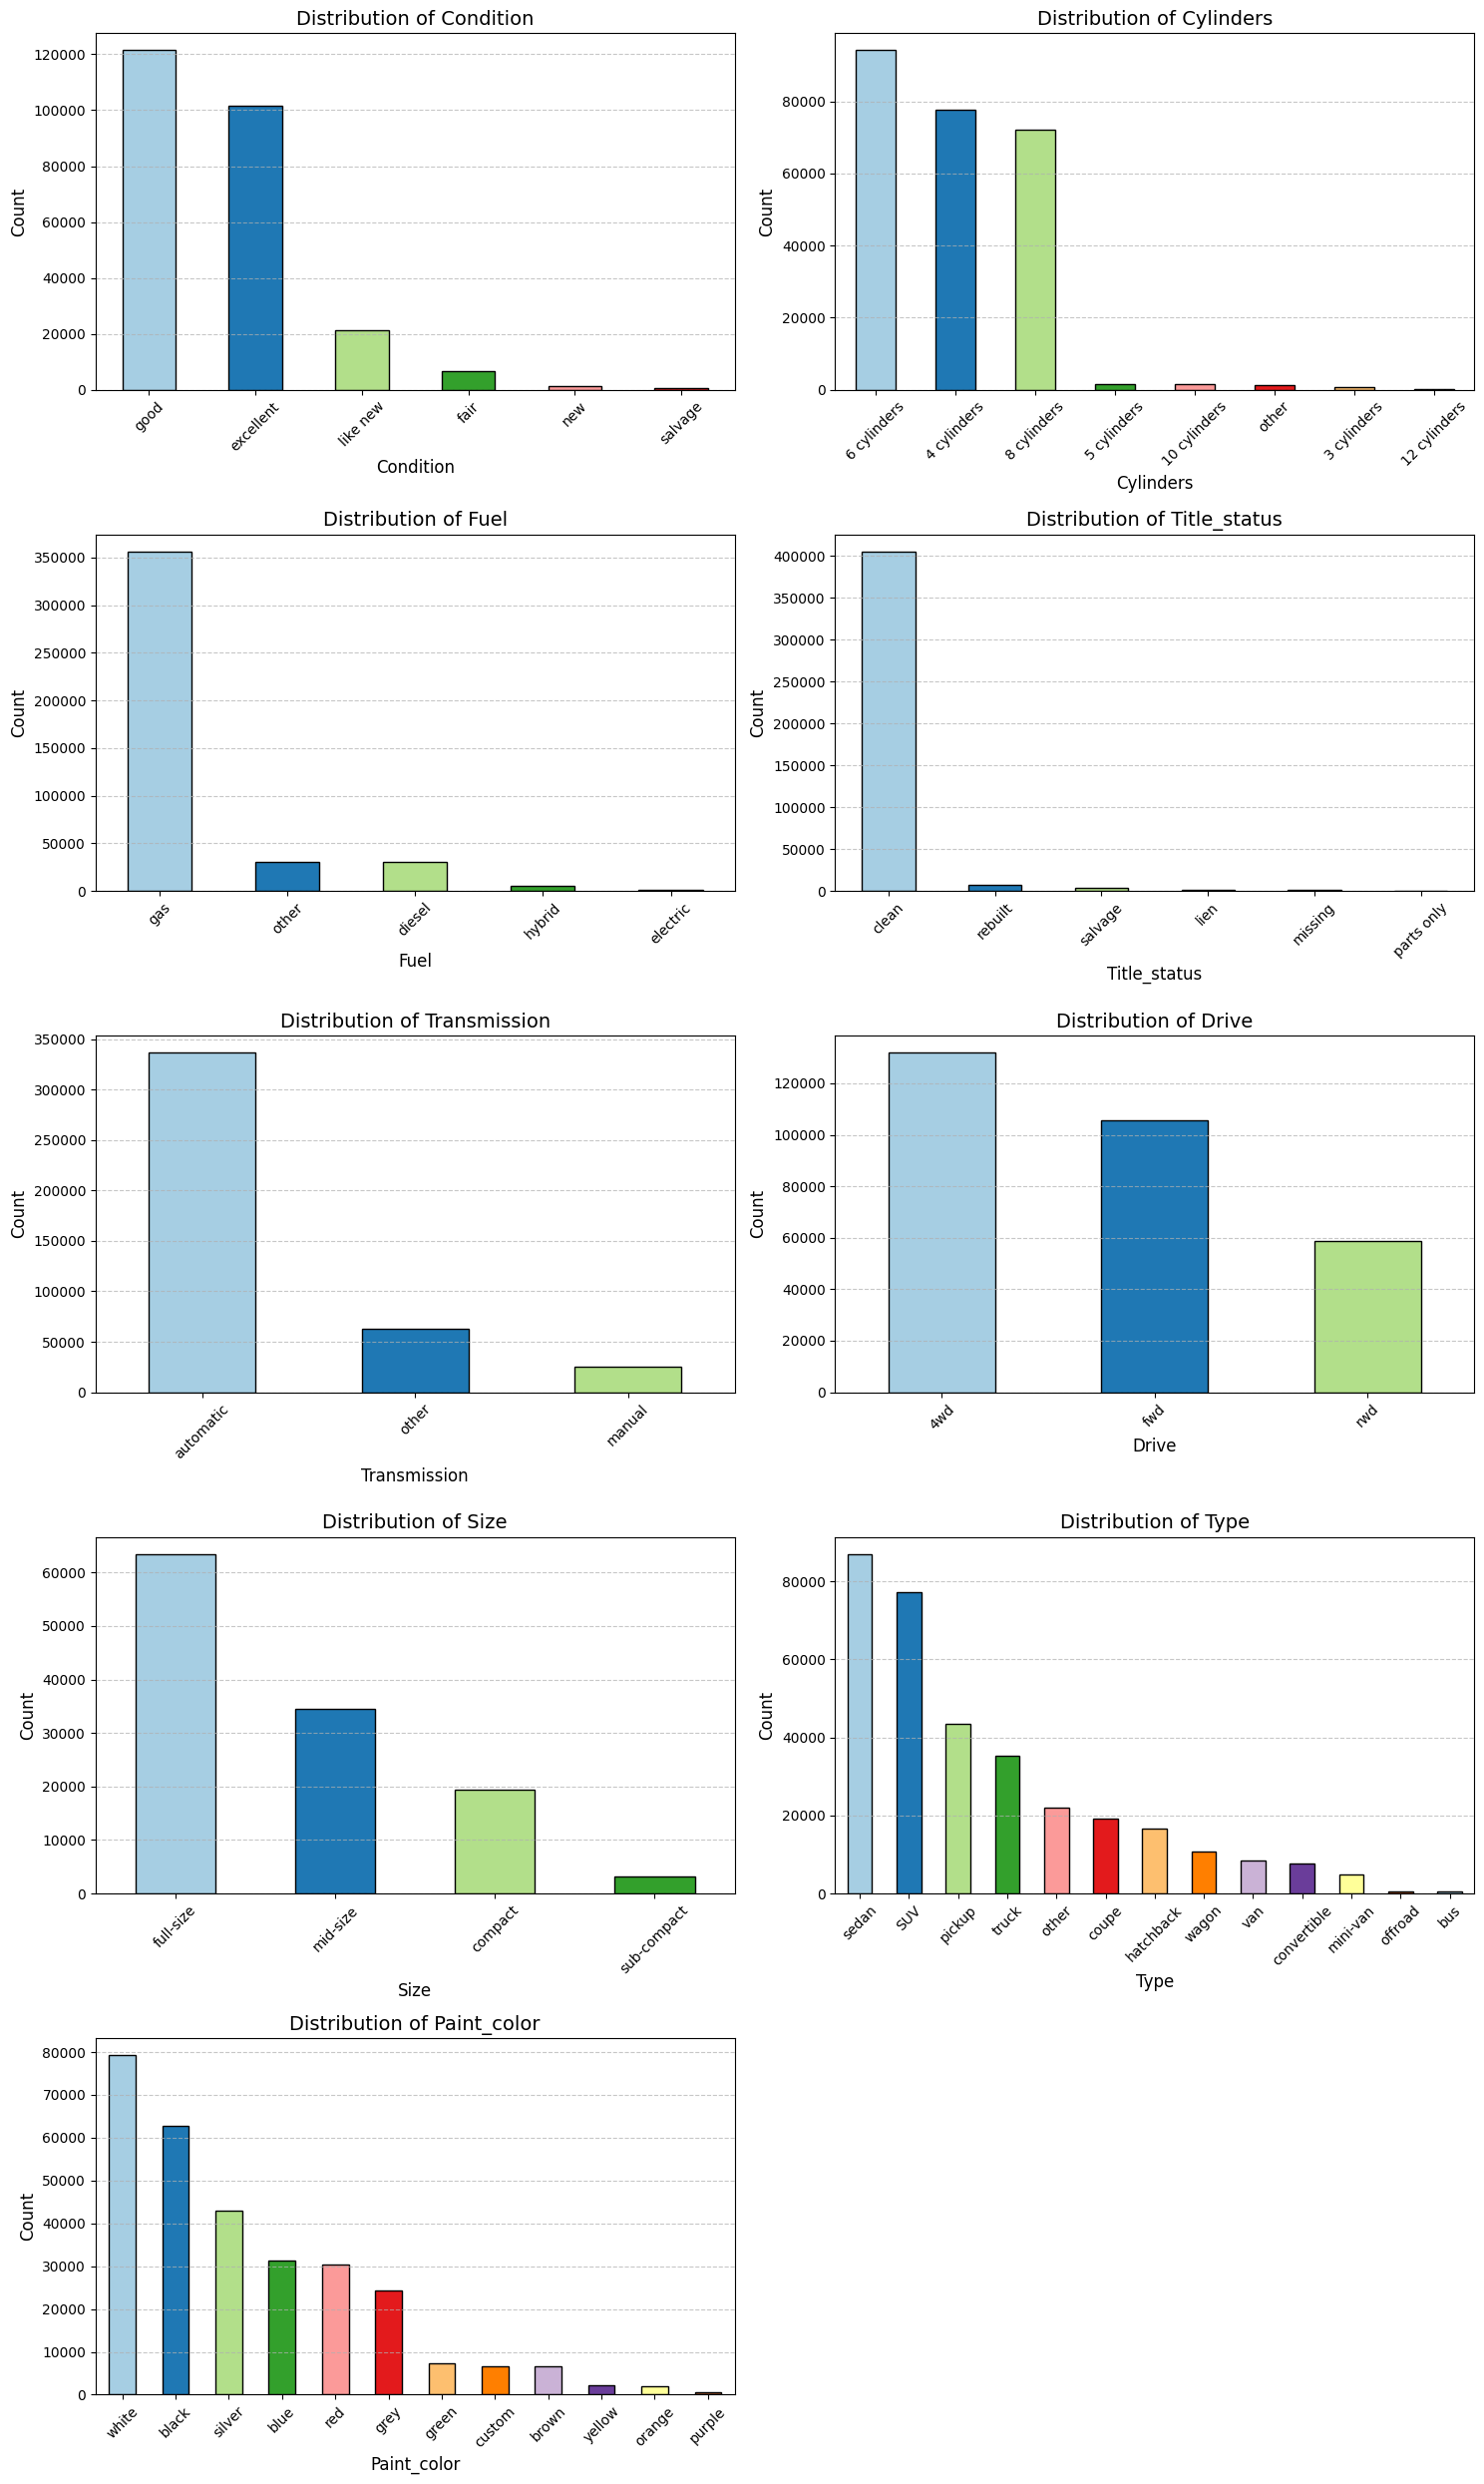

In [ ]:
columns_to_plot = ["condition", "cylinders", "fuel", "title_status", "transmission", "drive", "size", "type", "paint_color"]

# Set figure size and layout with 2 graphs per row
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))
axes = axes.flatten()

# Create a bar chart for each column
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    rawData[column].value_counts().plot(kind="bar", color=plt.cm.Paired.colors, edgecolor="black", ax=ax)
    ax.set_title(f"Distribution of {column.capitalize()}", fontsize=14)
    ax.set_xlabel(column.capitalize(), fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis="y", linestyle="--", alpha=0.7)

# Hide any empty subplots if needed
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### **Data Observation6**

**Condition Distribution**

- The majority of the vehicles in the dataset are categorized under a few specific conditions, with many missing or unknown values.
- "Like new" and "Excellent" conditions appear to be more frequent, while "Salvage" and "Fair" conditions are less common.

**Cylinders Distribution**

- 4-cylinder and 6-cylinder vehicles dominate the dataset, indicating a preference for fuel-efficient and mid-range performance vehicles.
- 8-cylinder engines, often found in trucks and sports cars, are also present but in smaller numbers.

**Fuel Type Distribution**

- Gasoline is the most common fuel type, suggesting that traditional fuel-powered vehicles still dominate the market.
- Diesel and hybrid vehicles have relatively lower counts, while electric vehicles make up a small fraction of the dataset.

**Title Status**

- The majority of the vehicles have a "Clean" title, meaning they have not been significantly damaged.
- "Salvage" and "Rebuilt" titles are less frequent, indicating that heavily damaged or repaired vehicles are not as common in listings.

**Transmission Type**

- Automatic transmission is the most prevalent, showing a strong consumer preference for convenience over manual shifting.
- Manual transmission vehicles are significantly less common, often associated with sports cars or older models.

**Drive Type**

- Front-wheel drive (FWD) and four-wheel drive (4WD/AWD) vehicles appear to be the most common.
- Rear-wheel drive (RWD) vehicles are less frequent, likely due to their association with sports cars and specific performance vehicles.

**Size Distribution**

- The dataset has a significant number of "Full-size" and "Mid-size" vehicles.
- Compact cars and subcompacts have a lower frequency, possibly due to demand differences in different regions.

**Vehicle Type**

- Trucks, SUVs, and sedans dominate the listings, which aligns with market trends favoring utility and comfort.
- Other types like convertibles and coupes have lower counts, likely reflecting niche market demand.

**Paint Color Distribution**

- The most common colors include black, white, silver, and gray, which are often considered standard and preferred for resale value.
- Uncommon colors like yellow, orange, and purple appear much less frequently, indicating a smaller market for such vehicles.

**Note**
The dataset reveals strong consumer preferences for gasoline-powered, automatic transmission vehicles with clean titles.
The most frequent vehicle categories are trucks, SUVs, and sedans, aligning with real-world sales trends.
Fuel efficiency (4-cylinder engines), neutral paint colors, and mid-size to full-size cars dominate the listings, indicating market demand for practicality and affordability.
There is a relatively low presence of electric, hybrid, and alternative-fuel vehicles, which might indicate slower adoption rates compared to gasoline-powered cars.

In [ ]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

## Check for Outliers

In [ ]:
rawData.describe()


,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


**Findings 5**: From describe which fetchs only int & float numerical statstics , ID columns might be not intereseted or relevant to car dealership client, which can be drop off


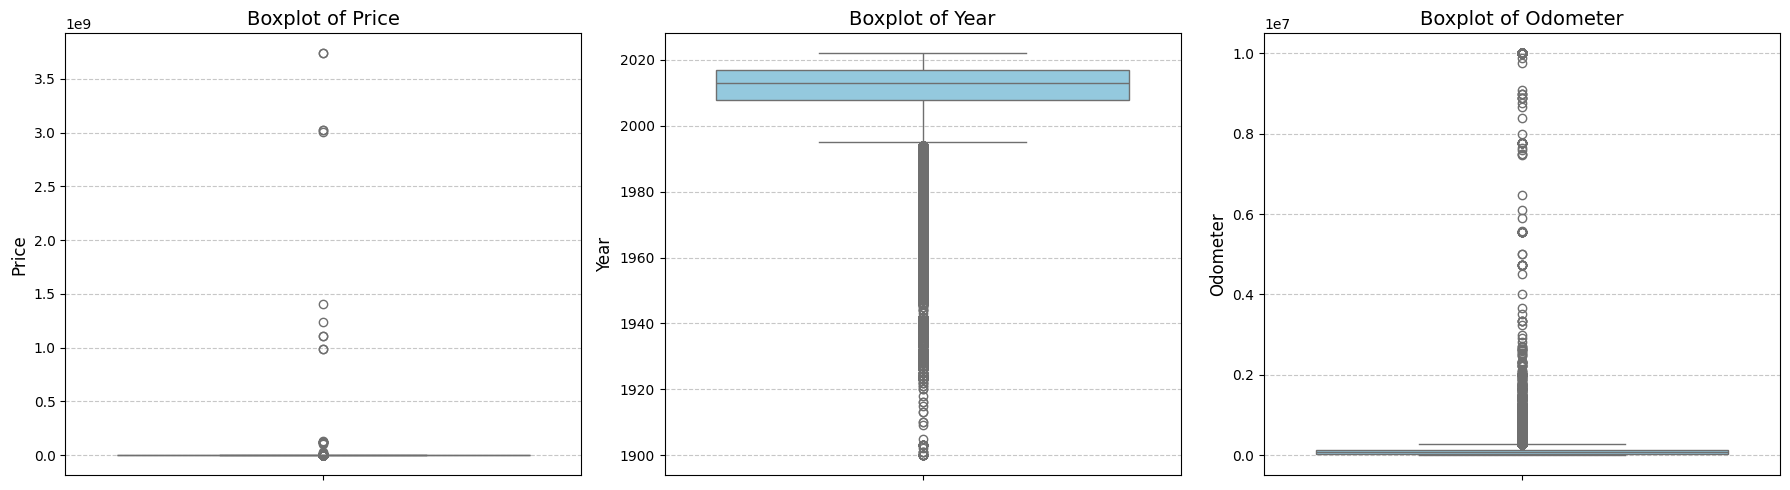

In [ ]:
# Select numerical columns for outlier detection
numerical_columns = ["price", "year", "odometer"]

# Set figure size for side-by-side comparison
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Create boxplots for detecting outliers side by side
for i, column in enumerate(numerical_columns):
    sns.boxplot(y=rawData[column], color="skyblue", ax=axes[i])
    axes[i].set_title(f"Boxplot of {column.capitalize()}", fontsize=14)
    axes[i].set_ylabel(column.capitalize(), fontsize=12)
    axes[i].grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

**Data Observation7**

**Price Outliers**

- The price distribution shows a significant number of extreme outliers.
- There are vehicles listed at extremely low prices (potentially unrealistic or promotional listings) and very high prices, possibly luxury or rare models.
- A reasonable price range should be determined to filter out erroneous data points.
- There are some listings where the price is recorded as zero.
- This could indicate:
-- Missing data where sellers did not input the price.
--  Incorrect or erroneous entries, which may need data cleaning

**Year Outliers**

- The year of manufacture appears to have some older vehicles that could be classified as vintage/classic cars.
- There may also be some outliers for future years, which could be incorrect or pre-orders rather than used listings.
- The bulk of the data is likely centered around more recent model years.

**Odometer Outliers**

- The odometer readings display a wide range, with some vehicles having extremely high mileage.
- Some extremely low-mileage cars could be newly listed or incorrect entries.
- High mileage vehicles may indicate well-used or older vehicles, whereas exceptionally low mileage could indicate showroom models or incorrect entries.

##Check for Missing Values (NaN)

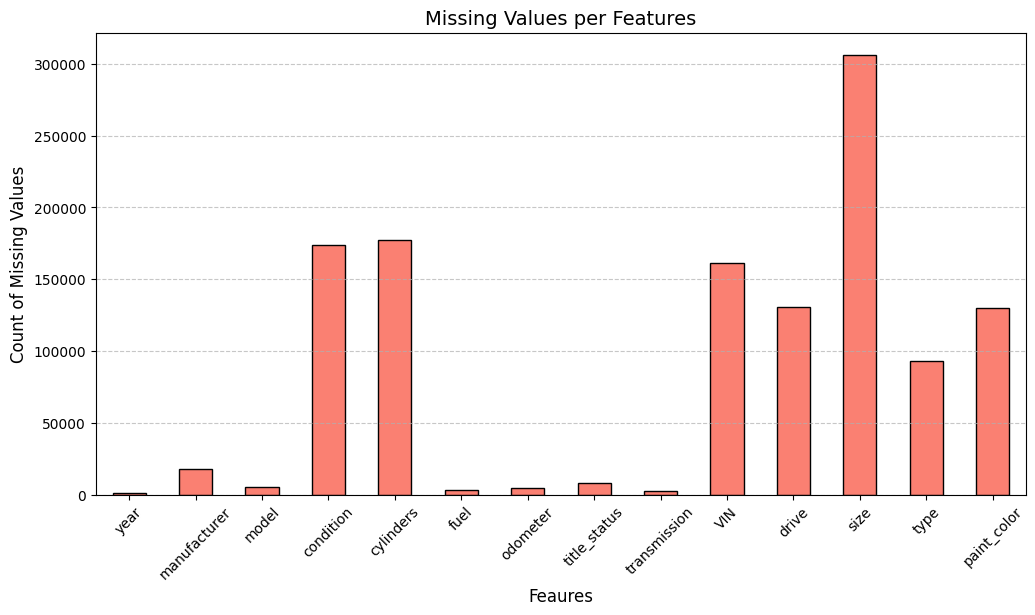

In [86]:
# Filter columns with missing values
missing_values = rawData.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Convert to DataFrame for visualization
missing_values_df = pd.DataFrame(missing_values, columns=["Missing Values"])
missing_values_df["Percentage"] = (missing_values_df["Missing Values"] / len(rawData)) * 100

# Plot missing values as a bar chart
plt.figure(figsize=(12, 6))
missing_values_df["Missing Values"].plot(kind="bar", color="salmon", edgecolor="black")
plt.title("Missing Values per Features", fontsize=14)
plt.xlabel("Feaures", fontsize=12)
plt.ylabel("Count of Missing Values", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [87]:
# Check missing values in the 'size' column
missing_size_count = rawData['VIN'].isnull().sum()
total_entries = len(rawData)
missing_percentage = (missing_size_count / total_entries) * 100

# Print the results
print(f"Total Entries: {total_entries}")
print(f"Missing Values in 'VIN' feature: {missing_size_count}")
print(f"Percentage of Missing Values: {missing_percentage:.2f}%")

Total Entries: 426880
Missing Values in 'VIN' feature: 161042
Percentage of Missing Values: 37.73%


In [88]:
# Check missing values in the 'size' column
missing_size_count = rawData['size'].isnull().sum()
total_entries = len(rawData)
missing_percentage = (missing_size_count / total_entries) * 100

# Print the results
print(f"Total Entries: {total_entries}")
print(f"Missing Values in 'size' column: {missing_size_count}")
print(f"Percentage of Missing Values: {missing_percentage:.2f}%")

Total Entries: 426880
Missing Values in 'size' column: 306361
Percentage of Missing Values: 71.77%


###Data Observation 10
- size feature as got around 71% of data missing, may this feature can be dropped.
- VIN feautre got 37% missing may be it is valid to remove the complete row as without VIN details entered would be inaccurate
- Year missing data as low percentage from above graph can be removed for the same

**Data Observation8**

**Recomendation**
- Drop rows if missing values are low (e.g., missing year).
- Fill categorical values with mode (manufacturer, fuel, transmission).
- Fill missing numerical values with median (price, odometer).
- Drop columns with excessive missing data if they are not critical (size)

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

## Drop row for duplicate VIN number based on price and odometer

In [198]:
rawData.shape

(426880, 18)

In [202]:
df_usedCar = pd.DataFrame.copy(rawData)
df_usedCar.shape

(426880, 18)

In [203]:
df_usedCar.drop_duplicates(subset=['VIN','price', 'odometer'], inplace=True)
df_usedCar.shape

(211771, 18)

## Drop rows for VIN column = '0'

In [204]:
df_usedCar.VIN.eq('0').sum()

8

In [205]:
df_usedCar.drop(df_usedCar[df_usedCar['VIN'] == '0'].index, inplace=True)
df_usedCar.shape

(211763, 18)

## Drop Columns that are not required (id, VIN & region)

In [206]:
df_usedCar.drop(columns=['id', 'VIN','region'], inplace=True)
df_usedCar.shape

(211763, 15)

## Drop Columns for size contains 71% of missing value

In [207]:
df_usedCar.drop(columns=['size'], inplace=True)
df_usedCar.shape

(211763, 14)

## Drop zero values for Price & Odometer

In [208]:
df_usedCar.price.eq(0).sum()

15504

In [209]:
df_usedCar.odometer.eq(0).sum()

723

In [210]:
df_usedCar.drop(df_usedCar[df_usedCar['price'] == 0].index, inplace=True)
df_usedCar.shape

(196259, 14)

In [211]:
df_usedCar.drop(df_usedCar[df_usedCar['odometer'] == 0].index, inplace=True)
df_usedCar.shape

(195671, 14)

### Fill categorial Null values (NaN) to Not specified

In [212]:
fill_columns = ['condition','cylinders','drive','paint_color','type','title_status','transmission','manufacturer','model','fuel']
for col in fill_columns:
    df_usedCar[col] = df_usedCar[col].fillna('Notspecified')

In [213]:
df_usedCar.isnull().sum()

,0
price,0
year,659
manufacturer,0
model,0
condition,0
cylinders,0
fuel,0
odometer,1127
title_status,0
transmission,0


### Drop null values for numerical field

In [214]:
df_usedCar.dropna(inplace=True)
df_usedCar.isnull().sum()

,0
price,0
year,0
manufacturer,0
model,0
condition,0
cylinders,0
fuel,0
odometer,0
title_status,0
transmission,0


In [215]:
df_usedCar.shape

(193933, 14)

## Convert DataTypes Object to String

In [216]:
df_usedCar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193933 entries, 27 to 426838
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         193933 non-null  int64  
 1   year          193933 non-null  float64
 2   manufacturer  193933 non-null  object 
 3   model         193933 non-null  object 
 4   condition     193933 non-null  object 
 5   cylinders     193933 non-null  object 
 6   fuel          193933 non-null  object 
 7   odometer      193933 non-null  float64
 8   title_status  193933 non-null  object 
 9   transmission  193933 non-null  object 
 10  drive         193933 non-null  object 
 11  type          193933 non-null  object 
 12  paint_color   193933 non-null  object 
 13  state         193933 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 22.2+ MB


In [253]:
df_usedCar['year'] = df_usedCar['year'].astype(int)
df_usedCar['odometer'] = df_usedCar['odometer'].astype(int)

In [254]:
df_usedCar = df_usedCar.convert_dtypes()

In [255]:
df_usedCar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193933 entries, 27 to 426838
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         193933 non-null  Int64 
 1   year          193933 non-null  Int64 
 2   manufacturer  193933 non-null  string
 3   model         193933 non-null  string
 4   condition     193933 non-null  string
 5   cylinders     193933 non-null  string
 6   fuel          193933 non-null  string
 7   odometer      193933 non-null  Int64 
 8   title_status  193933 non-null  string
 9   transmission  193933 non-null  string
 10  drive         193933 non-null  string
 11  type          193933 non-null  string
 12  paint_color   193933 non-null  string
 13  state         193933 non-null  string
dtypes: Int64(3), string(11)
memory usage: 22.7 MB


## Log Transformation for outliers

In [256]:
# Select numerical columns for log transformation
numerical_columns = ['price', 'odometer','year']

# Apply log transformation to reduce the effect of outliers
df_usedCar_log = df_usedCar.copy()
for col in numerical_columns:
    df_usedCar_log[col] = np.log1p(df_usedCar[col])  # log1p avoids log(0) issues

In [257]:
df_usedCar_log.shape

(193933, 14)

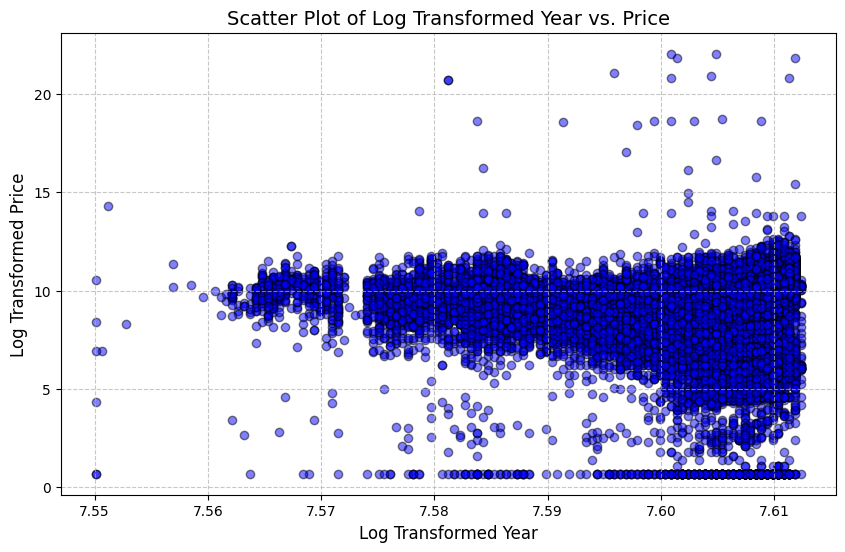

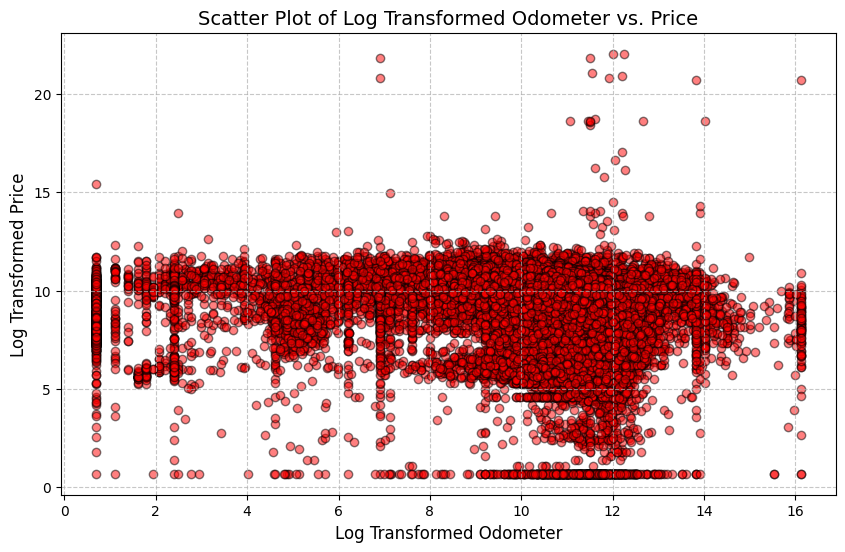

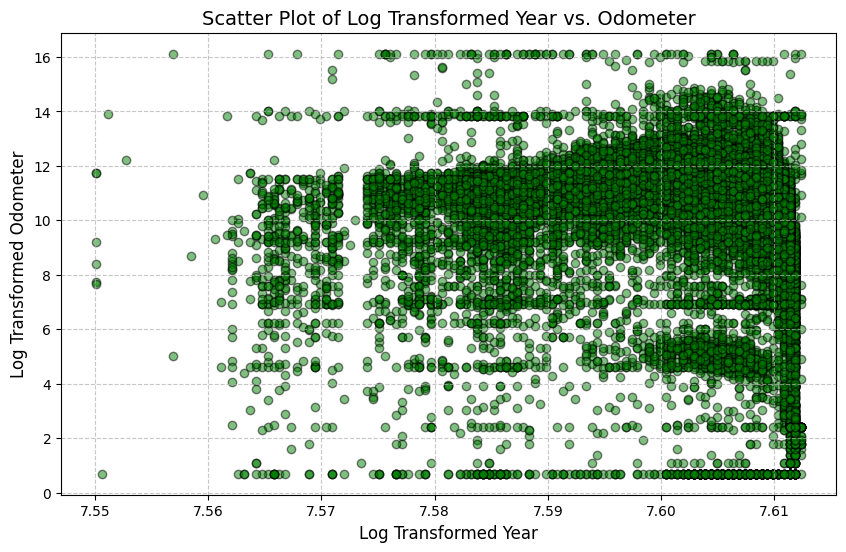

In [258]:
# Scatter plot for log-transformed year vs. log-transformed price
plt.figure(figsize=(10, 6))
plt.scatter(df_usedCar_log['year'], df_usedCar_log['price'], alpha=0.5, color='blue', edgecolors='black')

# Labels and title
plt.xlabel("Log Transformed Year", fontsize=12)
plt.ylabel("Log Transformed Price", fontsize=12)
plt.title("Scatter Plot of Log Transformed Year vs. Price", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Scatter plot for log-transformed odometer vs. log-transformed price
plt.figure(figsize=(10, 6))
plt.scatter(df_usedCar_log['odometer'], df_usedCar_log['price'], alpha=0.5, color='red', edgecolors='black')

# Labels and title
plt.xlabel("Log Transformed Odometer", fontsize=12)
plt.ylabel("Log Transformed Price", fontsize=12)
plt.title("Scatter Plot of Log Transformed Odometer vs. Price", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Scatter plot for log-transformed year  vs. log-transformed odometer
plt.figure(figsize=(10, 6))
plt.scatter(df_usedCar_log['year'], df_usedCar_log['odometer'], alpha=0.5, color='green', edgecolors='black')

# Labels and title
plt.xlabel("Log Transformed Year", fontsize=12)
plt.ylabel("Log Transformed Odometer", fontsize=12)
plt.title("Scatter Plot of Log Transformed Year vs. Odometer", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

## Observation
**Year vs. Price**

- Older vehicles (lower years) generally have lower prices.
- Newer vehicles tend to have higher prices.
- Some outliers exist where older cars have high prices (potentially classic or luxury cars).

**Odometer vs. Price**

- Vehicles with higher odometer readings generally have lower prices.
- Some vehicles deviate from this trend, which could indicate luxury vehicles or misreported data.

## Applying PCA for removing outliers

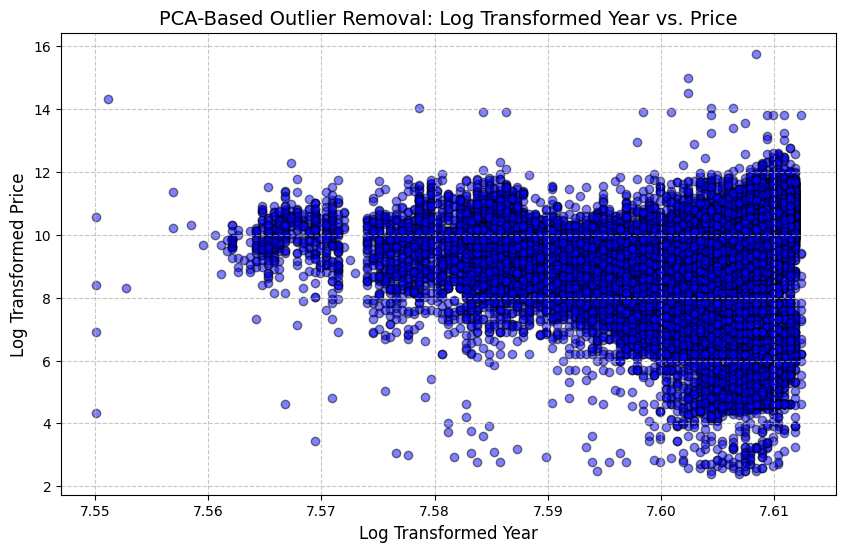

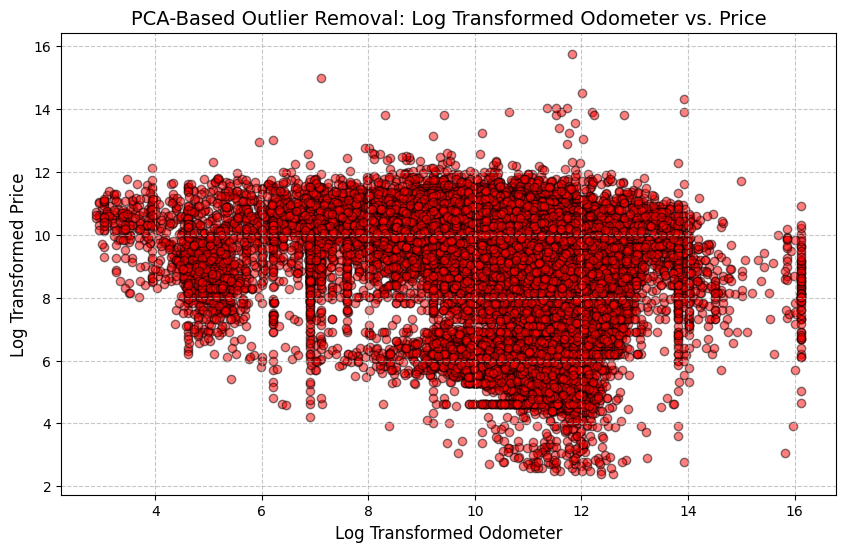

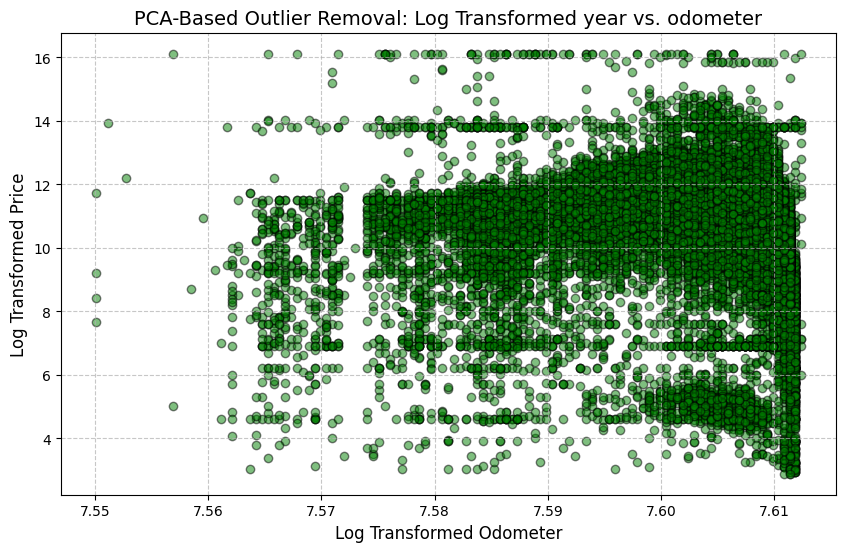

In [259]:
from sklearn.decomposition import PCA
from scipy.spatial.distance import mahalanobis
import scipy.stats as stats

# Apply PCA (keep top 2 components)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_usedCar_log[['price', 'odometer', 'year']])

# Compute Mahalanobis distance for each point
mean = np.mean(pca_features, axis=0)
cov_matrix = np.cov(pca_features.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)

df_usedCar_log['Mahalanobis_Distance'] = [mahalanobis(x, mean, inv_cov_matrix) for x in pca_features]

# Define threshold for outliers (e.g., 95th percentile)
threshold = stats.chi2.ppf(0.95, df=2)  # 95% confidence interval
df_no_outliers_pca = df_usedCar_log[df_usedCar_log['Mahalanobis_Distance'] < threshold]

# Scatter plot after PCA outlier removal
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers_pca['year'], df_no_outliers_pca['price'], alpha=0.5, color='blue', edgecolors='black')
plt.xlabel("Log Transformed Year", fontsize=12)
plt.ylabel("Log Transformed Price", fontsize=12)
plt.title("PCA-Based Outlier Removal: Log Transformed Year vs. Price", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Scatter plot after PCA outlier removal
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers_pca['odometer'], df_no_outliers_pca['price'], alpha=0.5, color='red', edgecolors='black')
plt.xlabel("Log Transformed Odometer", fontsize=12)
plt.ylabel("Log Transformed Price", fontsize=12)
plt.title("PCA-Based Outlier Removal: Log Transformed Odometer vs. Price", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Scatter plot after PCA outlier removal
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers_pca['year'], df_no_outliers_pca['odometer'], alpha=0.5, color='green', edgecolors='black')
plt.xlabel("Log Transformed Odometer", fontsize=12)
plt.ylabel("Log Transformed Price", fontsize=12)
plt.title("PCA-Based Outlier Removal: Log Transformed year vs. odometer", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


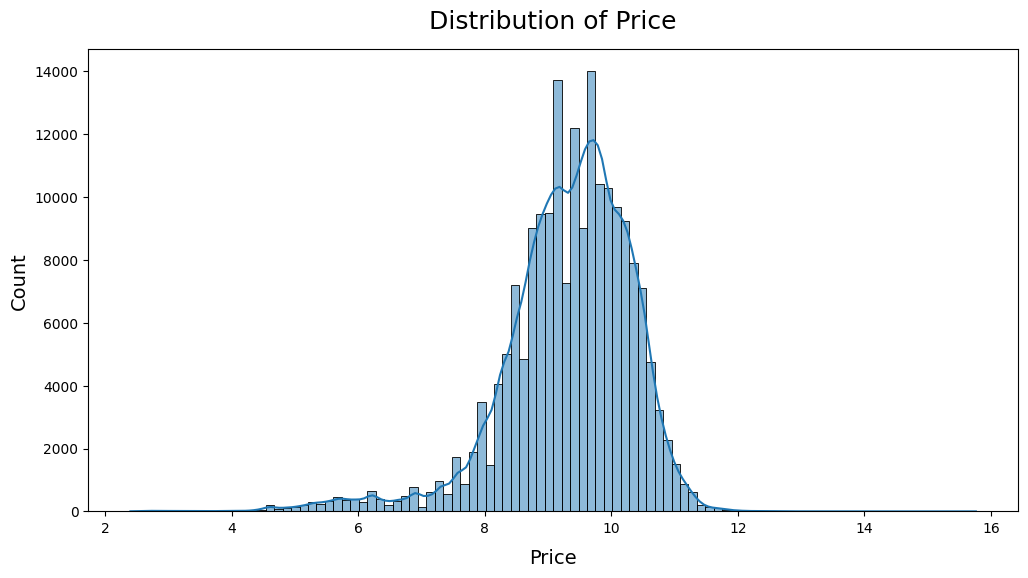

In [260]:
plt.figure(figsize=(12,6))
sns.histplot(x='price', data=df_no_outliers_pca, kde=True, bins=100)
plt.title('Distribution of Price', fontsize=18, pad=15)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Price', fontsize=14, labelpad=10)
plt.show()

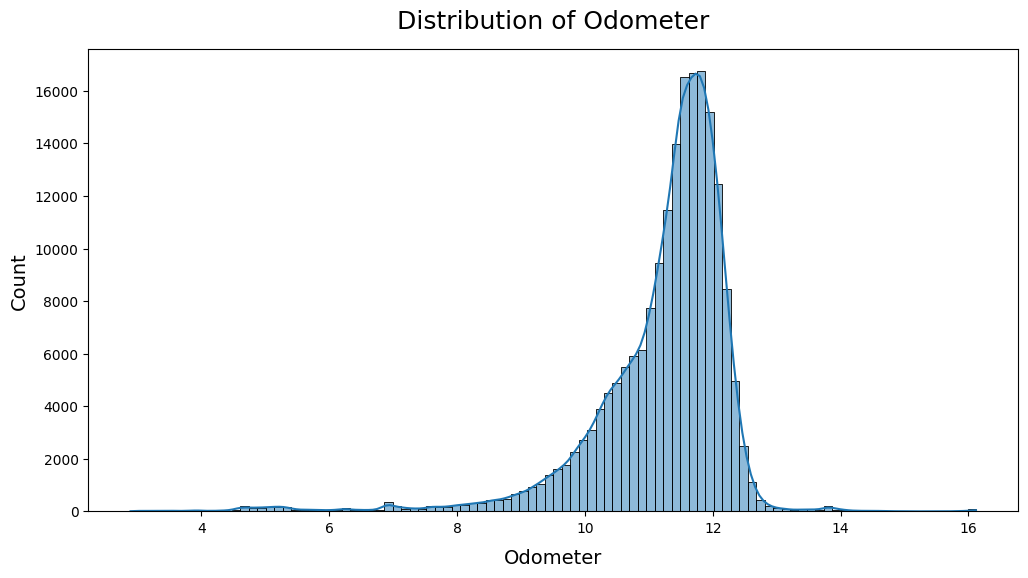

In [261]:
plt.figure(figsize=(12,6))
sns.histplot(x='odometer', kde=True, bins=100, data=df_no_outliers_pca)
plt.title('Distribution of Odometer', fontsize=18, pad=15)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Odometer', fontsize=14, labelpad=10)
plt.show()

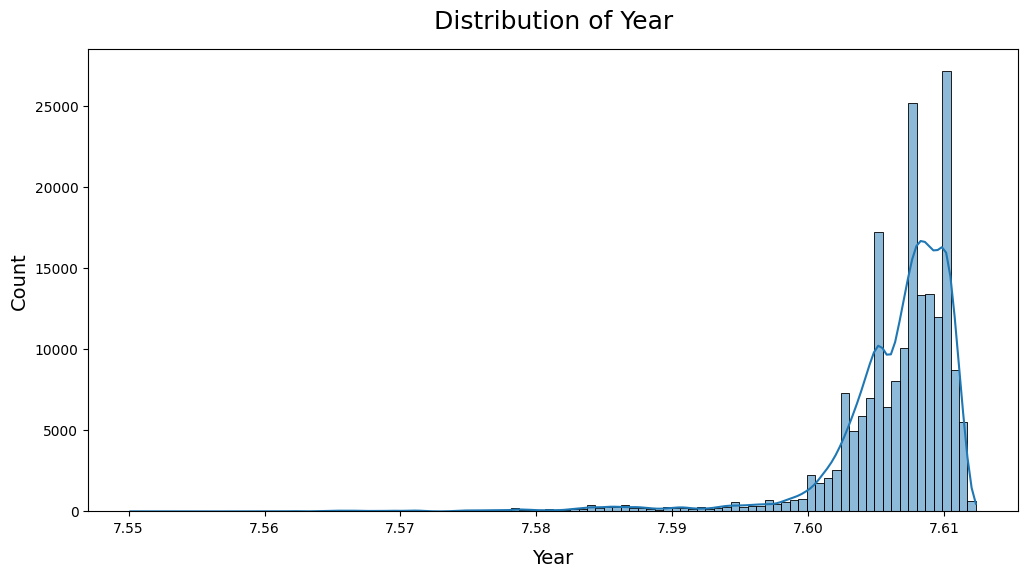

In [262]:
plt.figure(figsize=(12,6))
sns.histplot(x='year', kde=True, bins=100, data=df_no_outliers_pca)
plt.title('Distribution of Year', fontsize=18, pad=15)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Year', fontsize=14, labelpad=10)
plt.show()

In [264]:
df_no_outliers_pca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191837 entries, 27 to 426838
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   price                 191837 non-null  Float64
 1   year                  191837 non-null  Float64
 2   manufacturer          191837 non-null  string 
 3   model                 191837 non-null  string 
 4   condition             191837 non-null  string 
 5   cylinders             191837 non-null  string 
 6   fuel                  191837 non-null  string 
 7   odometer              191837 non-null  Float64
 8   title_status          191837 non-null  string 
 9   transmission          191837 non-null  string 
 10  drive                 191837 non-null  string 
 11  type                  191837 non-null  string 
 12  paint_color           191837 non-null  string 
 13  state                 191837 non-null  string 
 14  Mahalanobis_Distance  191837 non-null  float64
dtypes: F

In [266]:
df_no_outliers_pca_copy = pd.DataFrame.copy(df_no_outliers_pca)
df_no_outliers_pca_copy['price'] = df_no_outliers_pca_copy['price'].astype(int)
df_no_outliers_pca_copy['odometer'] = df_no_outliers_pca_copy['odometer'].astype(int)
df_no_outliers_pca_copy['year'] = df_no_outliers_pca_copy['year'].astype(int)

TypeError: Cannot interpret 'Float64Dtype()' as a data type

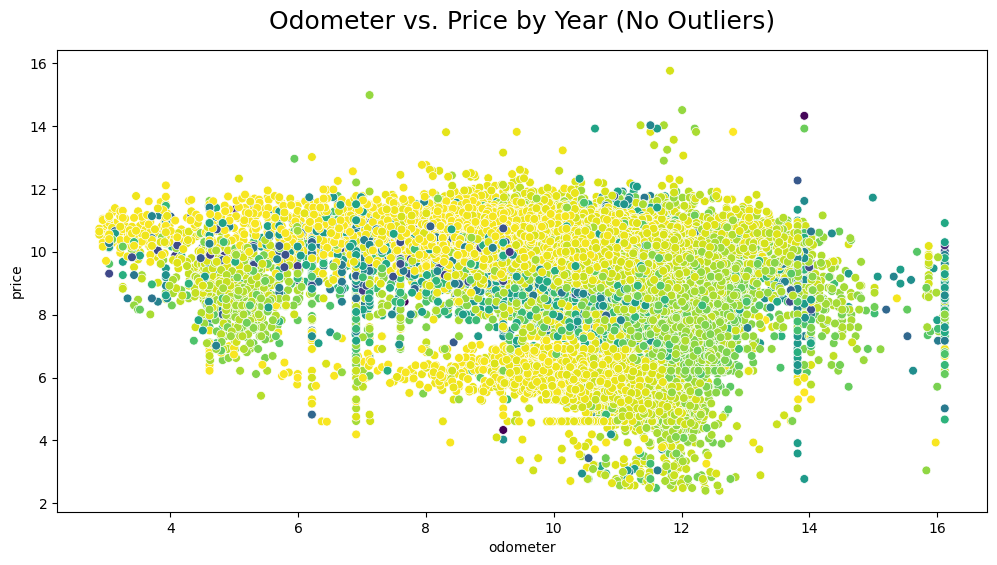

In [268]:
plt.figure(figsize=(12,6))
plt.title('Odometer vs. Price by Year (No Outliers)', fontsize=18, pad=15)
sns.scatterplot(data=df_no_outliers_pca, y='price', x='odometer', hue='year', palette='viridis', s=40, alpha=1)
plt.xlabel('Odometer', fontsize=14, labelpad=15)
plt.ylabel('Price', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.show()

## Data Encoding

In [269]:
df_encoding = pd.DataFrame.copy(df_no_outliers_pca)

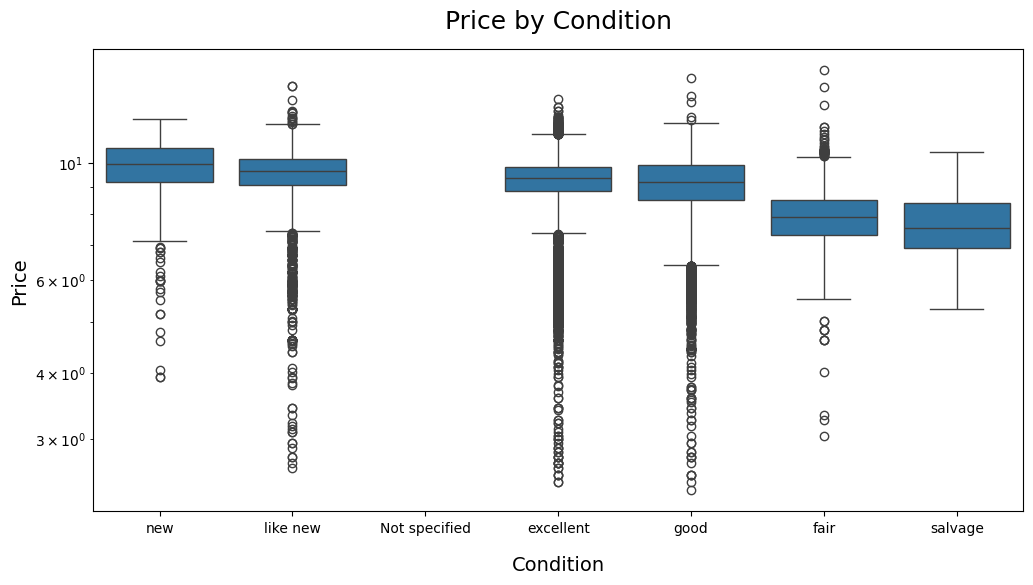

In [275]:
plt.figure(figsize=(12,6))
plt.title('Price by Condition', fontsize=18, pad=15)
sns.boxplot(y='price', x='condition', data=df_encoding,
            order=['new', 'like new', 'Not specified', 'excellent', 'good', 'fair', 'salvage'])
plt.xlabel('Condition', fontsize=14, labelpad=15)
plt.ylabel('Price', fontsize=14)
plt.yscale('log')
plt.show()

In [276]:
df_encoding.groupby('condition')['price'].mean().sort_values(ascending=False)

,price
condition,
new,9.813423
like new,9.573146
Notspecified,9.403174
excellent,9.344621
good,9.19151
fair,7.922535
salvage,7.627071


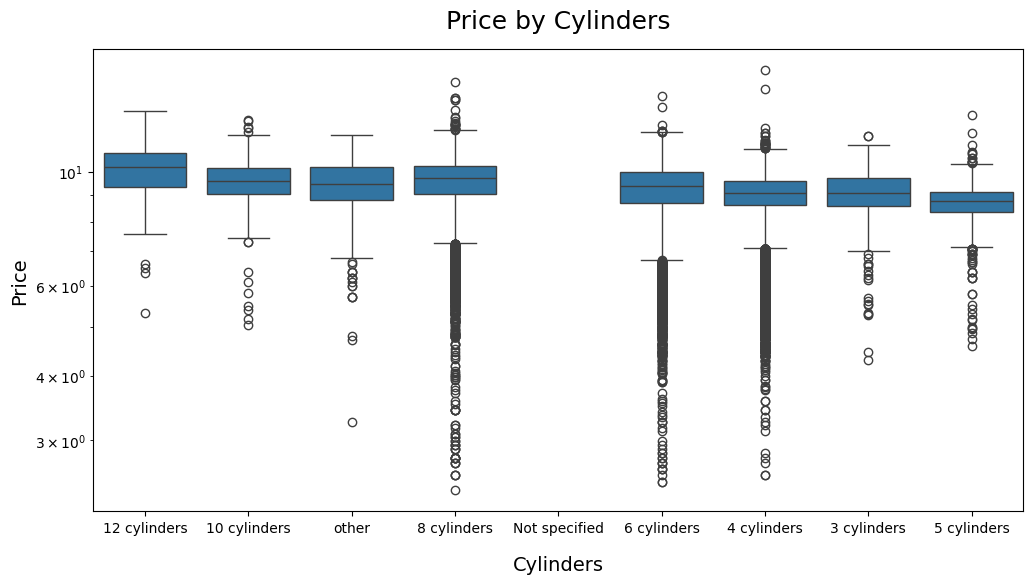

In [277]:
plt.figure(figsize=(12,6))
plt.title('Price by Cylinders', fontsize=18, pad=15)
sns.boxplot(y='price', x='cylinders', data=df_encoding,
            order=['12 cylinders', '10 cylinders', 'other', '8 cylinders', 'Not specified', '6 cylinders', '4 cylinders', '3 cylinders','5 cylinders'])
plt.xlabel('Cylinders', fontsize=14, labelpad=15)
plt.ylabel('Price', fontsize=14)
plt.yscale('log')
plt.show()

## Ordinal encoding

In [279]:
condition_map = {
    'new': 7,
    'like new': 6,
    'Not specified': 5,
    'excellent': 4,
    'good': 3,
    'fair': 2,
    'salvage': 1
}

cylinders_map = {
    '12 cylinders': 12,
    '10 cylinders': 10,
    'other': 9,
    '8 cylinders': 8,
    'Not specified': 7,
    '6 cylinders': 6,
    '5 cylinders': 5,
    '4 cylinders': 4,
    '3 cylinders': 3
}

df_encoding['condition'] = df_encoding['condition'].map(condition_map)
df_encoding['cylinders'] = df_encoding['cylinders'].map(cylinders_map)

## One hot encoding for fuel

In [280]:
# Apply one-hot encoding only to the 'fuel' column
df_encoded_fuel = pd.get_dummies(df_encoding, columns=['fuel'], drop_first=True)

# Display the first few rows to check encoding
print(df_encoded_fuel.head())

        price      year manufacturer                     model  condition  \
27  10.422013  7.608374          gmc  sierra 1500 crew cab slt        3.0   
28  10.025307  7.606387    chevrolet            silverado 1500        3.0   
29  10.586357  7.611348    chevrolet       silverado 1500 crew        3.0   
30  10.341452  7.609862       toyota      tundra double cab sr        3.0   
31   9.615872  7.607878         ford                 f-150 xlt        4.0   

    cylinders   odometer title_status transmission         drive    type  \
27        8.0  10.966887        clean        other  Notspecified  pickup   
28        8.0  11.173669        clean        other  Notspecified  pickup   
29        8.0   9.860632        clean        other  Notspecified  pickup   
30        8.0  10.624371        clean        other  Notspecified  pickup   
31        6.0  11.759793        clean    automatic           rwd   truck   

   paint_color state  Mahalanobis_Distance  fuel_diesel  fuel_electric  \
27    

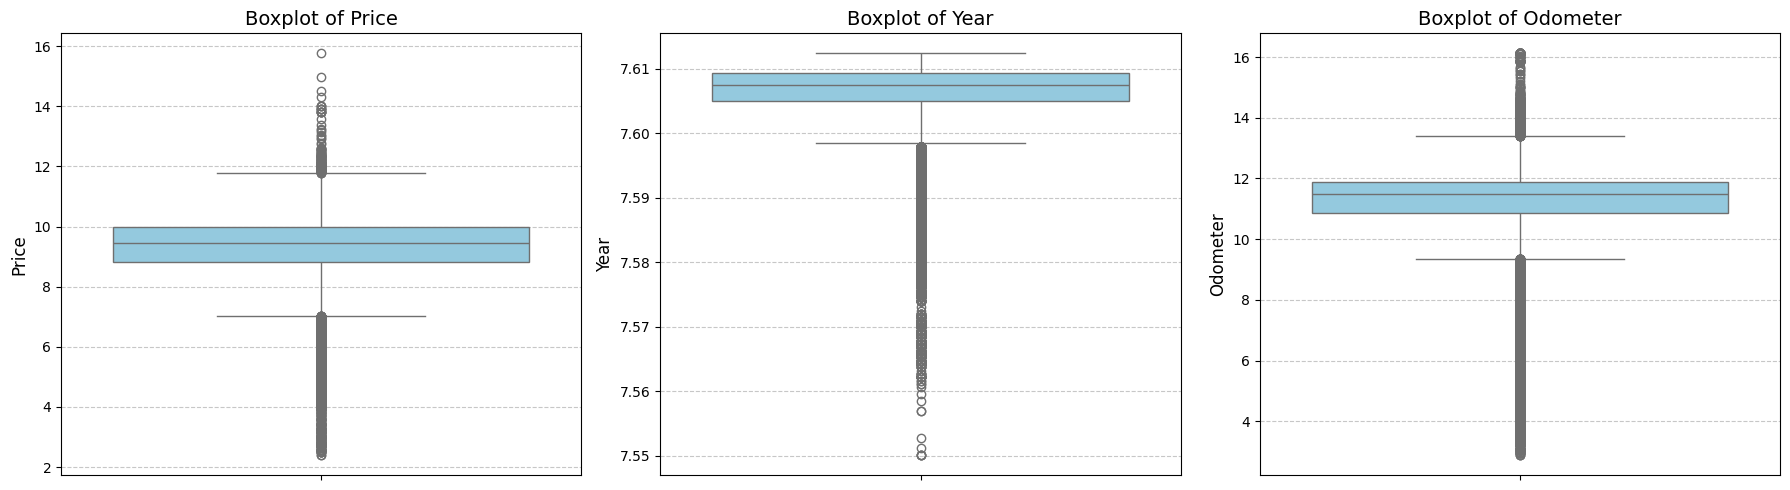

In [281]:
# Select numerical columns for outlier detection
numerical_columns = ["price", "year", "odometer"]

# Set figure size for side-by-side comparison
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Create boxplots for detecting outliers side by side
for i, column in enumerate(numerical_columns):
    sns.boxplot(y=df_no_outliers_pca[column], color="skyblue", ax=axes[i])
    axes[i].set_title(f"Boxplot of {column.capitalize()}", fontsize=14)
    axes[i].set_ylabel(column.capitalize(), fontsize=12)
    axes[i].grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

**Price Distribution (Price Boxplot)**

- There are many outliers in high-price values (luxury or premium cars).
- The median price is relatively low, suggesting most vehicles are affordable.
- Lower whiskers show some very cheap vehicles (possible salvage or damaged cars).

- Insights:

- Consider removing extreme high-price outliers to prevent misleading data.
- Investigate very low-priced listings for potential fraudulent or misclassified vehicles.

**Year Distribution (Year Boxplot)**

- The majority of vehicles are from the mid to late 2000s.
- Old cars (before 1990s) appear as outliers, possibly classic or vintage cars.
- Newer vehicles (past 2020) might have some anomalies due to incorrect data entries.

- Older cars (pre-1990) should be checked, as they might be incorrectly entered or special cases.

**Odometer Distribution (Odometer Boxplot)**

- The median odometer reading is moderate, but many high-mileage vehicles exist.
- High-mileage outliers (>300,000 miles) suggest either:

- Extreme odometer readings should be reviewed to detect possible incorrect entries.
- Very low-mileage listings should be verified as potential new vehicle misclassifications

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

## Linear Regression model (Odometer vs Price)

In [283]:
df_no_outliers_pca.shape

(191837, 15)

In [286]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the cleaned dataset
# Assuming df_cleaned is already available

# Splitting data into training and testing sets
X = df_no_outliers_pca[['odometer']]
y = df_no_outliers_pca['price']


In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [288]:
# Creating a pipeline with standard scaling and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])



In [289]:
# Fitting the model
pipeline.fit(X_train, y_train)



Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [290]:
# Making predictions
y_pred = pipeline.predict(X_test)

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [291]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

if r2 < 0.5:
    print("R² score is low, suggesting the model does not explain much variance in price. Consider adding more features such as manufacturer, year, or condition.")
elif r2 < 0.8:
    print("R² score is moderate, indicating a partial relationship between odometer and price, but more features could improve performance.")
else:
    print("R² score is high, meaning the model explains most of the variance in price based on odometer.")

Mean Squared Error: 0.9790896703413839
R^2 Score: 0.09973999904216435
R² score is low, suggesting the model does not explain much variance in price. Consider adding more features such as manufacturer, year, or condition.


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.